<a href="https://colab.research.google.com/github/Dhineshks/nlp-workouts/blob/master/Classification/visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd drive/MyDrive/nlp

/content/drive/MyDrive/nlp


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

train_data = pd.read_csv("Corona_NLP_train.csv",encoding='latin-1')
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [3]:
train_data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [4]:
train_data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [5]:
# train_data.dtypes

In [6]:
train_data['Sentiment_cat'] = train_data['Sentiment'].replace(['Positive'],0).replace(['Negative'],1).replace(['Neutral'],2).replace(['Extremely Positive'],3).replace(['Extremely Negative'],4)

[Text(0, 0, 'Positive'),
 Text(0, 0, 'Negative'),
 Text(0, 0, 'Neutral'),
 Text(0, 0, 'Extremely Positive'),
 Text(0, 0, 'Extremely Negative')]

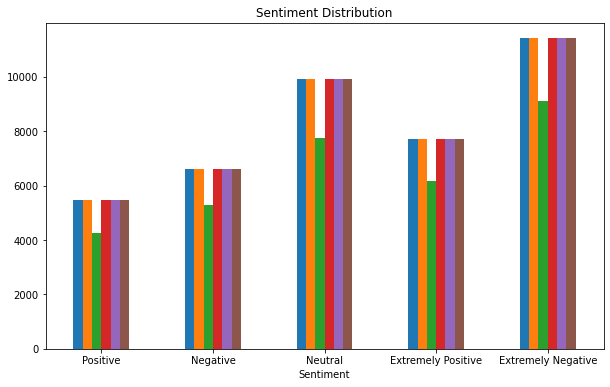

In [7]:


plt.rcParams["figure.figsize"] = (10,6)
ax = train_data.groupby('Sentiment').count().plot(kind='bar', title='Sentiment Distribution', legend=False)
ax.set_xticklabels(['Positive','Negative','Neutral','Extremely Positive','Extremely Negative'], rotation=0)

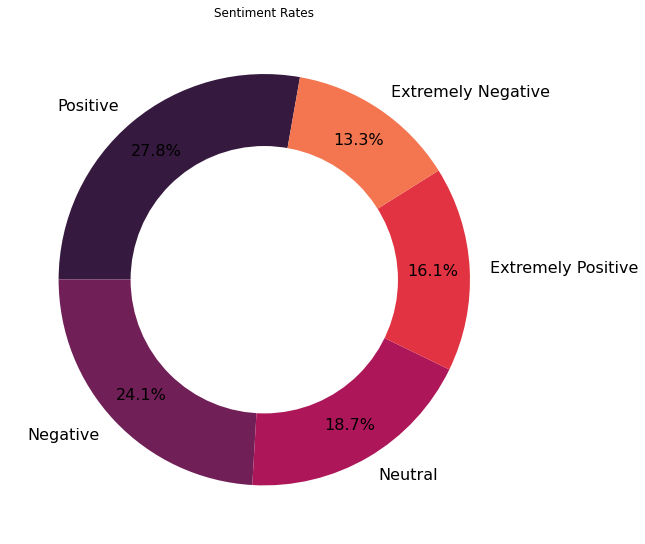

In [8]:
plt.figure(figsize=(9,9))

sentiments = train_data.Sentiment.value_counts()

sns.set_palette("rocket")
plt.pie(sentiments,
        labels= sentiments.index,
        autopct='%1.1f%%', startangle=80, 
        pctdistance=0.82, textprops={"fontsize": 16})

centreCircle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centreCircle)

plt.tight_layout()
plt.title("Sentiment Rates")

plt.show()

In [9]:
pos = train_data[train_data['Sentiment_cat']== 0]
pos = pos.groupby(['TweetAt'], as_index=False).count()

neg = train_data[train_data['Sentiment_cat']== 1]
neg = neg.groupby(['TweetAt'], as_index=False).count()

neu = train_data[train_data['Sentiment_cat']== 2]
neu = neu.groupby(['TweetAt'], as_index=False).count()

ext_pos = train_data[train_data['Sentiment_cat']== 3]
ext_pos = ext_pos.groupby(['TweetAt'], as_index=False).count()

ext_neg = train_data[train_data['Sentiment_cat']== 4]
ext_neg = ext_neg.groupby(['TweetAt'], as_index=False).count()

In [10]:
pos = pos[['TweetAt','UserName']]
neg = neg[['TweetAt','UserName']]
neu = neu[['TweetAt','UserName']]
ext_pos = ext_pos[['TweetAt','UserName']]
ext_neg = ext_neg[['TweetAt','UserName']]

In [11]:
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['TweetAt'], y=pos['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green',
                             hovertemplate = '<br>Sentiment="Positive"<br>Date=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['TweetAt'], y=neg['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red',
                             hovertemplate = '<br>Sentiment="Negative"<br>Date=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )
    
for col in neu.columns:
    fig.add_trace(go.Scatter(x=neu['TweetAt'], y=neu['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='blue',
                             hovertemplate = '<br>Sentiment="Neutral"<br>Date=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )
    
for col in ext_pos.columns:
    fig.add_trace(go.Scatter(x=ext_pos['TweetAt'], y=ext_pos['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='yellow',
                             hovertemplate = '<br>Sentiment="Extremely Positive"<br>Date=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )
for col in ext_neg.columns:
    fig.add_trace(go.Scatter(x=ext_neg['TweetAt'], y=ext_neg['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='orange',
                             hovertemplate = '<br>Sentiment="Entremely Negative"<br>Date=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )
    
fig.show()

In [12]:
train_data.Location = train_data.Location.str.split(',').str[0]

In [13]:
train_data.Location

0                              London
1                                  UK
2                           Vagabonds
3                                 NaN
4                                 NaN
                     ...             
41152                 Wellington City
41153                             NaN
41154                             NaN
41155                             NaN
41156    i love you so much || he/him
Name: Location, Length: 41157, dtype: object

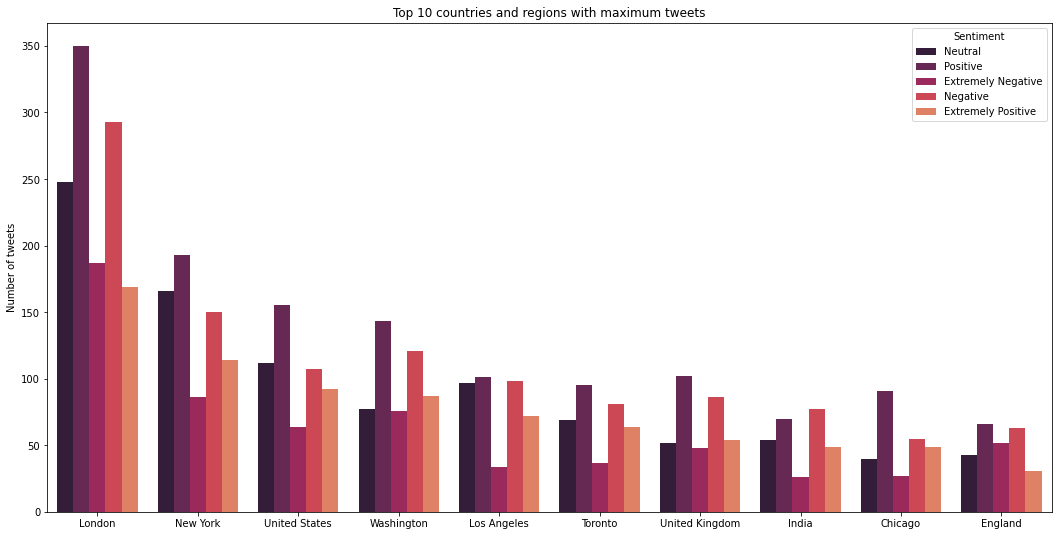

In [14]:
plt.figure(figsize=(18, 9))
location = sns.countplot(x= 'Location', data= train_data, hue="Sentiment", order=train_data.Location.value_counts()[:10].index)
location.set_title("Top 10 countries and regions with maximum tweets", y=1)

def axis_labels(ax):
    ax.set_ylabel("Number of tweets")
    ax.set_xlabel("")

axis_labels(location)

plt.show()

In [15]:
ind_loc = train_data[train_data['Location']== "India"]
ind_loc = ind_loc.groupby(['Sentiment'], as_index=False).count()   

us_loc = train_data[train_data['Location']== "United States"]
us_loc = us_loc.groupby(['Sentiment'], as_index=False).count()

uk_loc = train_data[train_data['Location']== "United Kingdom"]
uk_loc = uk_loc.groupby(['Sentiment'], as_index=False).count()

ca_loc = train_data[train_data['Location']== "Canada"]
ca_loc = ca_loc.groupby(['Sentiment'], as_index=False).count()

ind_loc = ind_loc[['Sentiment','UserName']]
us_loc = us_loc[['Sentiment','UserName']]
uk_loc = uk_loc[['Sentiment','UserName']]
ca_loc = ca_loc[['Sentiment','UserName']]

In [16]:
fig = go.Figure()
for col in ind_loc.columns:
    fig.add_trace(go.Scatter(x=ind_loc['Sentiment'], y=ind_loc['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green',
                             hovertemplate = '<br>Country="India"<br>Sentiment=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )

for col in us_loc.columns:
    fig.add_trace(go.Scatter(x=us_loc['Sentiment'], y=us_loc['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red',
                             hovertemplate = '<br>Country="United States"<br>Sentiment=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )
    
for col in uk_loc.columns:
    fig.add_trace(go.Scatter(x=uk_loc['Sentiment'], y=uk_loc['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='blue',
                             hovertemplate = '<br>Country="United Kingdom"<br>Sentiment=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )
    
for col in ca_loc.columns:
    fig.add_trace(go.Scatter(x=ca_loc['Sentiment'], y=ca_loc['UserName'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='yellow',
                             hovertemplate = '<br>Country="Canada"<br>Sentiment=%{x}<br>Users=%{y}<extra></extra>'
                             )
                 )
    
fig.show()

In [17]:
train_data['TweetAt'] = pd.to_datetime(train_data['TweetAt'])
train_data['day'] = train_data['TweetAt'].dt.dayofweek
train_data['month'] = train_data['TweetAt'].dt.month

days = {0: 'Monday', 1: 'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
months = {0: 'January ', 1: 'February', 2:'March', 3: 'April', 4: 'May', 5: 'June', 6: 'July',
      7:'August', 8:'September', 9: 'October', 10: 'November', 11: 'December'  }

train_data["day"] = train_data["day"].map(days)
train_data["month"] = train_data["month"].map(months)
train_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_cat,day,month
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2,Monday,April
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0,Monday,April
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0,Monday,April
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,0,Monday,April
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,4,Monday,April
...,...,...,...,...,...,...,...,...,...
41152,44951,89903,Wellington City,2020-04-14,Airline pilots offering to stock supermarket s...,Neutral,2,Tuesday,May
41153,44952,89904,NaN,2020-04-14,Response to complaint not provided citing COVI...,Extremely Negative,4,Tuesday,May
41154,44953,89905,NaN,2020-04-14,You know itÂs getting tough when @KameronWild...,Positive,0,Tuesday,May
41155,44954,89906,NaN,2020-04-14,Is it wrong that the smell of hand sanitizer i...,Neutral,2,Tuesday,May


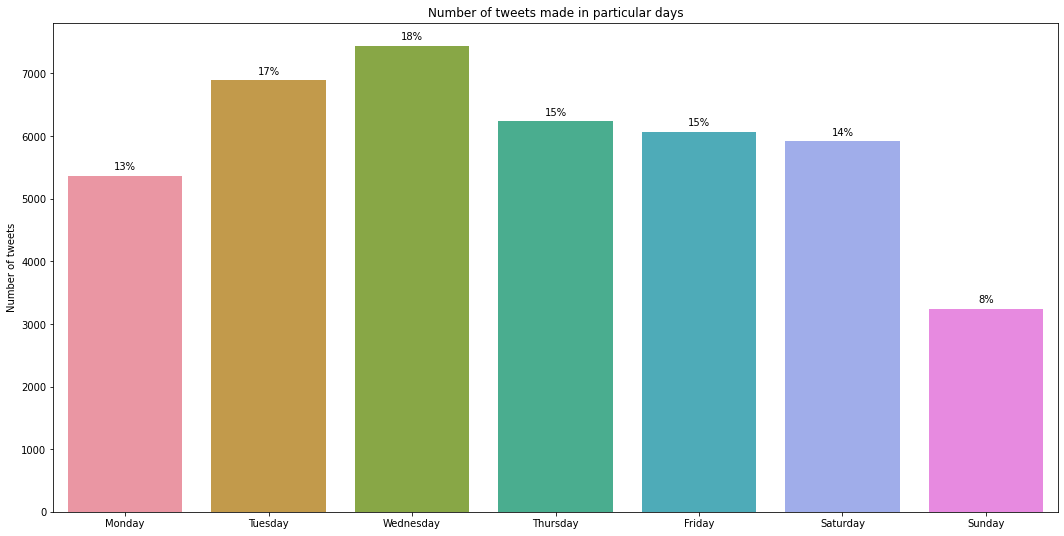

In [18]:
plt.figure(figsize=(18, 9))
days = sns.countplot(x="day", data=train_data)
days.set_title("Number of tweets made in particular days", y=1)

def add_labels(ax, space):
    for rect in ax.patches:
        width = rect.get_width()
        height = rect.get_height()
        total = train_data.shape[0]
        
        ax.text(rect.get_x() + width/2,
               height + space,
               '{}%'.format(int(np.round(height/total*100))),
                ha="center")

add_labels(days, 100)
axis_labels(days)
plt.show()

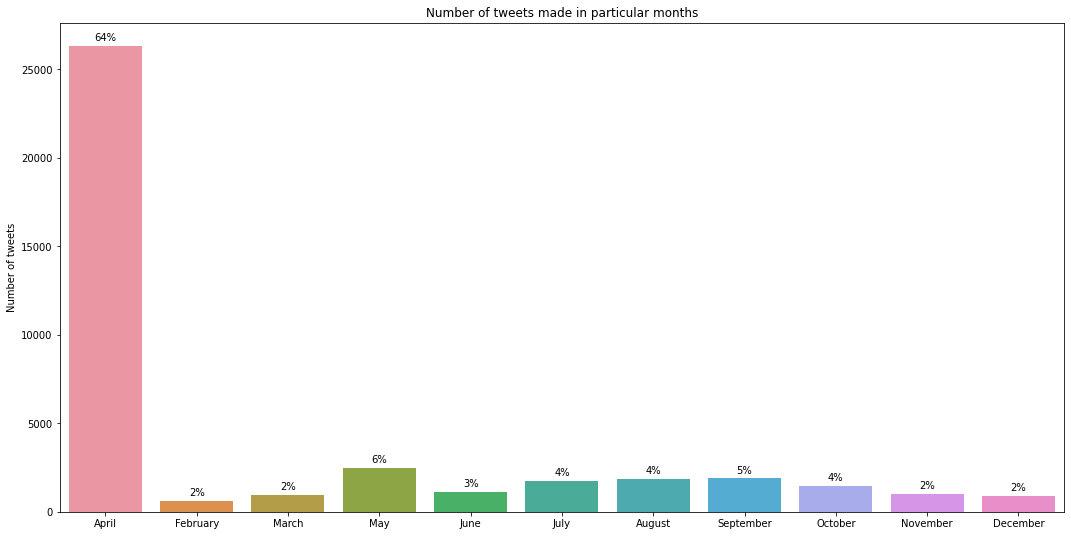

In [19]:
plt.figure(figsize=(18, 9))
months = sns.countplot(x="month", data=train_data)
months.set_title("Number of tweets made in particular months", y=1)

add_labels(months, 300)
axis_labels(months)
plt.show()